In [1]:
import numpy as np
import pandas as pd
import _pickle as pickle

In [2]:
with open('fingerprint.dat', 'rb') as fp:
    X_train = pickle.load(fp)
    X_train_std = pickle.load(fp)
    X_test = pickle.load(fp)
    X_test_std = pickle.load(fp)
    y_train = pickle.load(fp)
    y_test = pickle.load(fp)

In [3]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (400, 6)
X_test shape:  (100, 6)
y_train shape:  (400,)
y_test shape:  (100,)


# logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [5]:
log_model = LogisticRegression(solver = 'lbfgs', random_state = 42)
log_scores = cross_val_score(log_model, X_train_std, y_train, cv = 10)
print("log_scores: ", log_scores)
print("Mean score: ", log_scores.mean())
print("Std deviation: ", log_scores.std())

log_scores:  [0.925 0.9   0.95  0.95  1.    1.    0.875 0.925 0.95  0.9  ]
Mean score:  0.9375
Std deviation:  0.03913118960624631


In [6]:
log_model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
log_reg_score = log_model.score(X_test_std, y_test)
print(log_reg_score)

0.94


In [8]:
log_yy_pred = log_model.predict(X_test_std)

In [9]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_true=y_test, y_pred=log_yy_pred)
print(confMatrix)

[[48  2]
 [ 4 46]]


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=log_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=log_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=log_yy_pred))

Precision: 0.958
Recall: 0.920
F1: 0.939


# SVM

## LINEAR KERNEL

In [11]:
from sklearn.svm import SVC

In [12]:
#Best estimator obtained from hyp_svc_linear_and rbf file
svm_linear_model = SVC(C=12, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
svm_linear_scores = cross_val_score(svm_linear_model, X_train_std, y_train, cv = 10)
print("svm_linear_scores: ", svm_linear_scores)
print("Mean score: ", svm_linear_scores.mean())
print("Std deviation: ", svm_linear_scores.std())

svm_linear_scores:  [0.95  0.9   0.95  0.975 1.    1.    0.875 0.925 0.95  0.875]
Mean score:  0.9399999999999998
Std deviation:  0.043588989435406726


In [14]:
svm_linear_model.fit(X_train_std, y_train)
svm_linear_score = svm_linear_model.score(X_test_std, y_test)
svm_linear_score

0.98

In [15]:
svm_linear_yy_pred = svm_linear_model.predict(X_test_std) 
svm_linear_yy_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [16]:
svm_linear_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_linear_yy_pred)
print(svm_linear_model_confMatrix)

[[50  0]
 [ 2 48]]


In [17]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_linear_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_linear_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_linear_yy_pred))

Precision: 1.000
Recall: 0.960
F1: 0.980


# rbf kernel

In [18]:
#Best estimator obtained from hyp_svc_linear_and rbf file
svm_rbf_model = SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
svm_rbf_scores = cross_val_score(svm_rbf_model, X_train_std, y_train, cv = 10)
print("svm_linear_scores: ", svm_rbf_scores)
print("Mean score: ", svm_rbf_scores.mean())
print("Std deviation: ", svm_rbf_scores.std())

svm_linear_scores:  [0.975 0.925 0.975 0.975 1.    0.975 0.925 0.95  0.975 0.95 ]
Mean score:  0.9624999999999998
Std deviation:  0.023048861143232204


In [20]:
svm_rbf_model.fit(X_train_std, y_train)
svm_rbf_score = svm_rbf_model.score(X_test_std, y_test)
svm_rbf_score

0.99

In [21]:
svm_rbf_yy_pred = svm_rbf_model.predict(X_test_std) 

In [22]:
svm_rbf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_rbf_yy_pred)
print(svm_rbf_model_confMatrix)

[[49  1]
 [ 0 50]]


In [23]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_rbf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_rbf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_rbf_yy_pred))

Precision: 0.980
Recall: 1.000
F1: 0.990


# decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# using best parameters from decision tree
tree_clf_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
           max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [26]:
tree_clf_scores = cross_val_score(tree_clf_model, X_train_std, y_train, cv = 10)
print("tree_clf_scores: ", tree_clf_scores)
print("Mean score: ", tree_clf_scores.mean())
print("Std deviation: ", tree_clf_scores.std())

tree_clf_scores:  [0.975 0.95  0.975 0.975 1.    1.    0.9   0.95  1.    0.9  ]
Mean score:  0.9625
Std deviation:  0.03579455265819088


In [27]:
tree_clf_model.fit(X_train_std, y_train)
tree_clf_score = tree_clf_model.score(X_test_std, y_test)
tree_clf_score

0.98

In [28]:
tree_clf_yy_pred = tree_clf_model.predict(X_test_std)

In [29]:
tree_clf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=tree_clf_yy_pred)
print(tree_clf_model_confMatrix)

[[48  2]
 [ 0 50]]


In [30]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=tree_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=tree_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=tree_clf_yy_pred))

Precision: 0.962
Recall: 1.000
F1: 0.980


# ada boost classification

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
# using best params from ada boost model
ada_boost_clf_model = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.6, n_estimators=21, random_state=42)

In [33]:
ada_boost_clf_score = cross_val_score(ada_boost_clf_model,X_train_std,y_train,cv = 10)
print("ada_boost_clf_score:",ada_boost_clf_score)
print("mean score:",ada_boost_clf_score.mean())
print("standard deviation:",ada_boost_clf_score.std())

ada_boost_clf_score: [0.95  0.9   0.95  0.925 1.    0.95  0.9   0.925 1.    0.9  ]
mean score: 0.9400000000000001
standard deviation: 0.035707142142714234


In [34]:
ada_boost_clf_model.fit(X_train_std,y_train)
ada_boost_clf_score = ada_boost_clf_model.score(X_test_std,y_test)
ada_boost_clf_score

0.97

In [35]:
ada_boost_clf_yy_pred = ada_boost_clf_model.predict(X_test_std)

In [44]:
ada_boost_clf_model_confMatrix = confusion_matrix(y_true = y_test,y_pred = ada_boost_clf_yy_pred)
print(ada_boost_clf_model_confMatrix)

[[49  1]
 [ 2 48]]


In [38]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=ada_boost_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=ada_boost_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=ada_boost_clf_yy_pred))

Precision: 0.980
Recall: 0.960
F1: 0.970


# gradient boosting classification 

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
grad_boost_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [41]:
grad_boost_scores = cross_val_score(grad_boost_model,X_train_std,y_train,cv =10)
print("grad_boost_scores:",grad_boost_scores)
print("grad_boost_scores_mean:",grad_boost_scores.mean())
print("grad_boost_scores_std:",grad_boost_scores.std())

grad_boost_scores: [0.975 0.95  0.975 1.    1.    0.975 0.925 0.95  1.    0.925]
grad_boost_scores_mean: 0.9675
grad_boost_scores_std: 0.027499999999999986


In [42]:
grad_boost_model.fit(X_train_std,y_train)
grad_boost_clf_score = grad_boost_model.score(X_test_std,y_test)
print(grad_boost_clf_score)

0.99


In [43]:
grad_boost_yy_pred = grad_boost_model.predict(X_test_std)

In [45]:
grad_boost_confMatrix = confusion_matrix(y_true = y_test,y_pred = grad_boost_yy_pred)
print(grad_boost_confMatrix)

[[49  1]
 [ 0 50]]


In [46]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=grad_boost_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=grad_boost_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=grad_boost_yy_pred))

Precision: 0.980
Recall: 1.000
F1: 0.990


# Random forest classification

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rand_forest_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rand_forest_scores = cross_val_score(rand_forest_model,X_train_std,y_train,cv = 10)
print("rand_forest_scores:",rand_forest_scores)
print("rand_forest_scores_mean:",rand_forest_scores.mean())
print("rand_forest_scores_std:",rand_forest_scores.std())

rand_forest_scores: [0.975 0.95  0.975 1.    1.    1.    0.9   0.95  0.975 0.9  ]
rand_forest_scores_mean: 0.9625
rand_forest_scores_std: 0.03579455265819088


In [50]:
rand_forest_model.fit(X_train_std,y_train)
rand_forest_score = rand_forest_model.score(X_test_std,y_test)
print(rand_forest_score)

0.99


In [51]:
rand_forest_yy_pred = rand_forest_model.predict(X_test_std)

In [52]:
rand_forest_confMatrix = confusion_matrix(y_true = y_test,y_pred = rand_forest_yy_pred)
print(rand_forest_confMatrix)

[[49  1]
 [ 0 50]]


In [53]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=rand_forest_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=rand_forest_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=rand_forest_yy_pred))

Precision: 0.980
Recall: 1.000
F1: 0.990


# plotting of classification scores

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

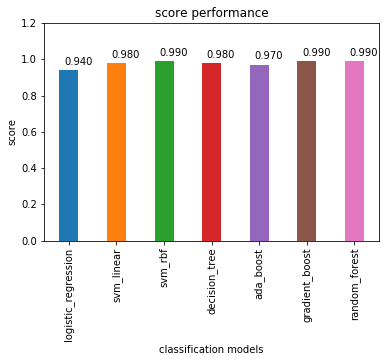

In [58]:
x_plot = range(7)
y_plot = [log_reg_score,svm_linear_score,svm_rbf_score,tree_clf_score,ada_boost_clf_score,grad_boost_clf_score,rand_forest_score]
x_label = ["logistic_regression","svm_linear","svm_rbf","decision_tree","ada_boost","gradient_boost","random_forest"]
#plt.bar(x_label[0],y_plot[0],width = 0.5)
#plt.bar(x_label[1],y_plot[1],width = 0.5)
plt.xticks(x_plot,x_label,rotation = 90,color = "black")
#plt.bar(x_plot,y_plot,width = 0.4)
for i in range(7):
    plt.bar(x_plot[i],y_plot[i],width = 0.4)

for j in range(len(x_plot)):
    plt.text(x = x_plot[j]-.10,y = y_plot[j]+0.03,s = "%.3f" %(y_plot[j]),size = 10)
    
    
plt.ylabel("score")
plt.xlabel("classification models")
plt.ylim([0,1.2]) 
plt.title("score performance")
plt.show()